Copyright @ 2021 ABCOM Information Systems Pvt. Ltd. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and limitations under the License.


# Breast Cancer Tumor Diagnosis

## Creator: Vedant Mane, Thilakraj Devadiga


Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Loading Libraries


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
warnings.filterwarnings("ignore")

### Loading Data


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/abcom-mltutorials/breast-cancer-data/main/data.csv" , index_col = 0)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 32)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Separate Target Variable from Feature Variables


In [ ]:
y = data.diagnosis
drop_cols = ["Unnamed: 32", "diagnosis"]
x = data.drop(drop_cols, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Diagnosis Distribution

In [ ]:
B, M = y.value_counts()
print("Number of Benign Tumor: {}\nNumber of Malignant Tumors: {}".format(B,M))

Number of Benign Tumor: 357
Number of Malignant Tumors: 212


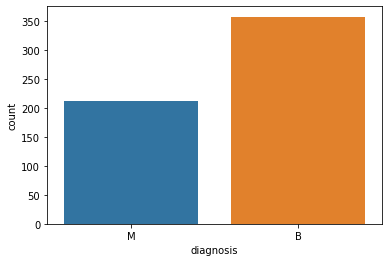

In [ ]:
ax = sns.countplot(y, label = "Count")

### Dataset Description

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualizing Standardized Data with Seaborn

* ***Violin Plots***  
A **Violin Plot** is used to visualise the *distribution of the data* and its *probability density*. This chart is a combination of a **Box Plot** and a **Density Plot** that is rotated and placed on each side, to show the distribution shape of the data.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

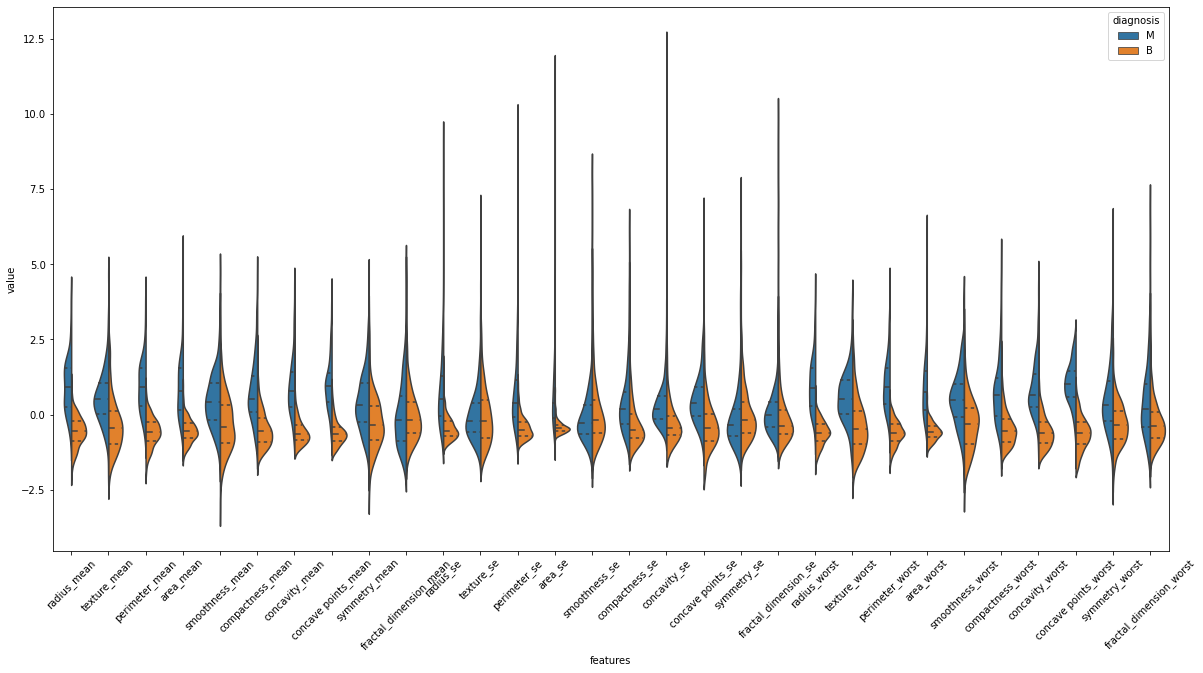

In [ ]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0 : 30]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (20,10))
sns.violinplot(x="features", y = "value", hue = "diagnosis", 
               data = data, split = True, inner = "quart")
plt.xticks(rotation = 45)

The Plot appears to be cluttered and so let's make the above simple and readable. We have 30 features and so we will visualize the plot in 3 steps with 10 features each.

1. Features (1 - 10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

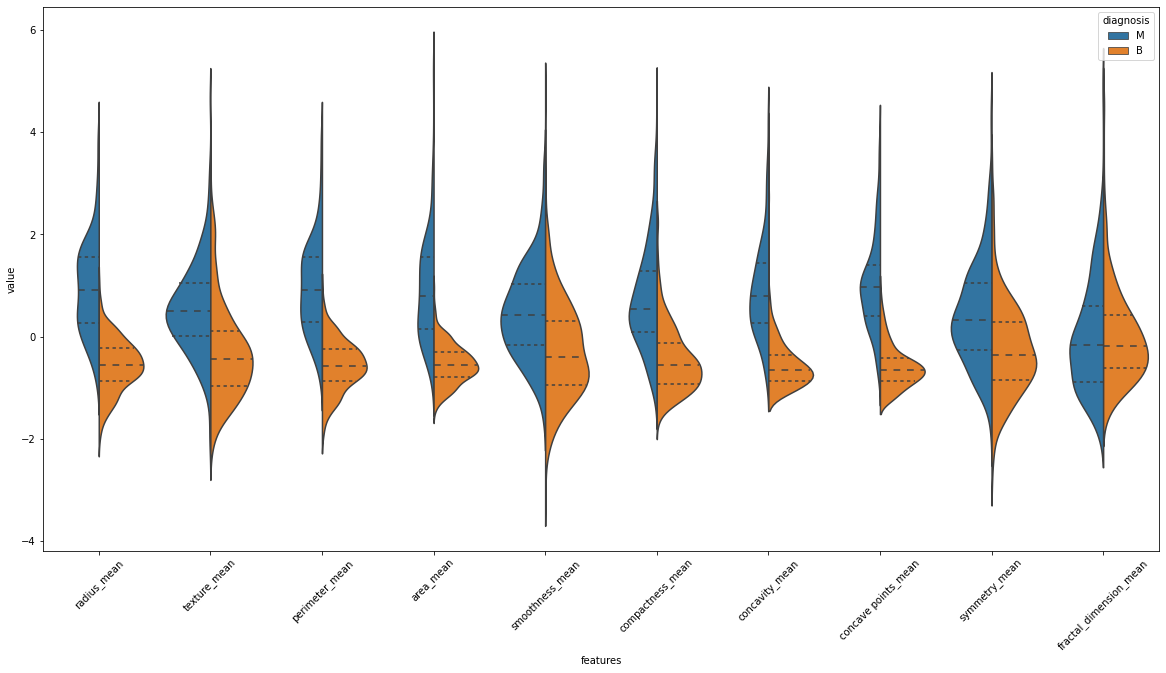

In [ ]:
data = pd.concat([y, data_std.iloc[:, 0 : 10]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (20,10))
sns.violinplot(x="features", y = "value", hue = "diagnosis", 
               data = data, split = True, inner = "quart")
plt.xticks(rotation = 45)

2. Features (11-20)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

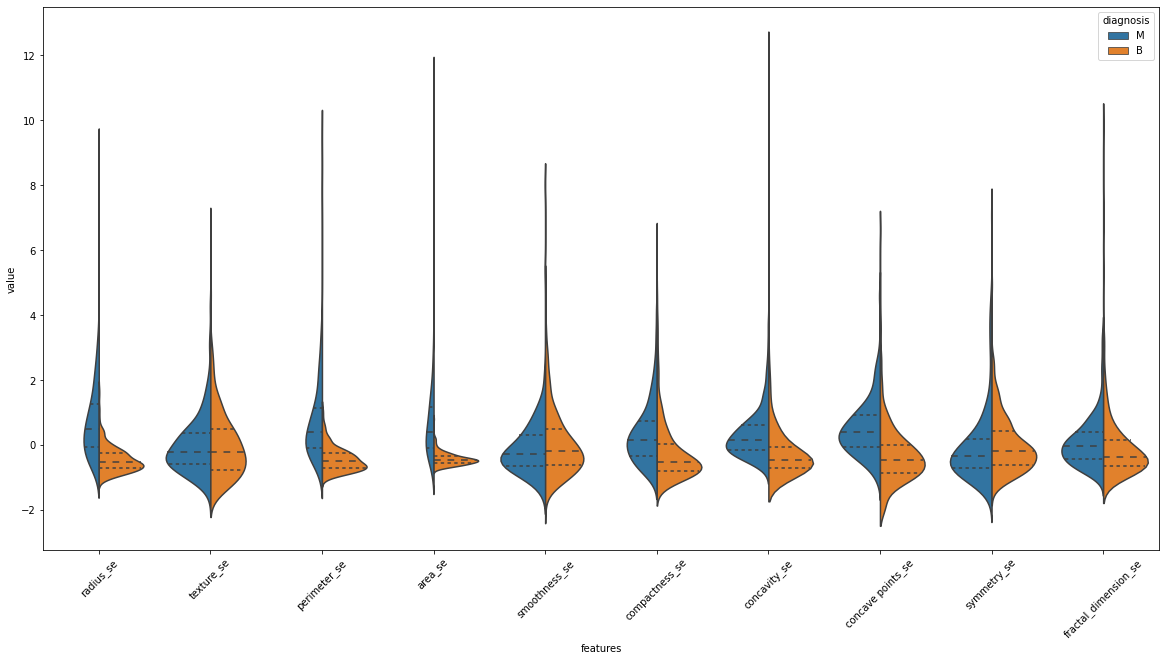

In [ ]:
data = pd.concat([y, data_std.iloc[:, 10 : 20]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (20,10))
sns.violinplot(x="features", y = "value", hue = "diagnosis", 
               data = data, split = True, inner = "quart")
plt.xticks(rotation = 45)

3. Features (21 - 30)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

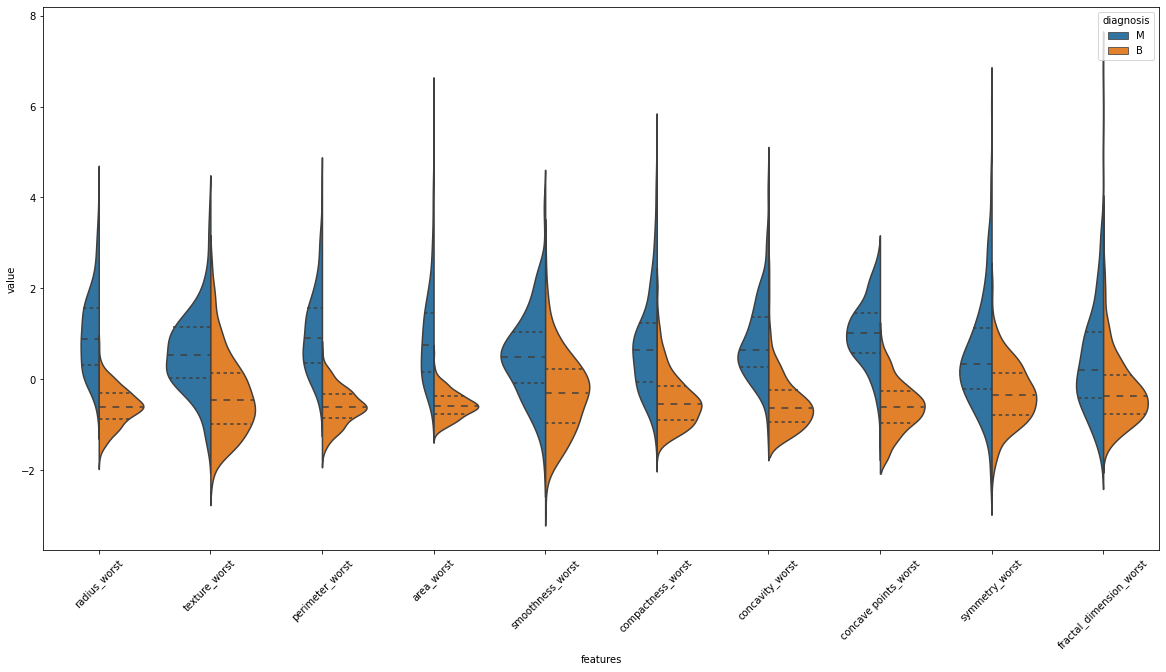

In [ ]:
data = pd.concat([y, data_std.iloc[:, 20 : 30]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (20,10))
sns.violinplot(x="features", y = "value", hue = "diagnosis", 
               data = data, split = True, inner = "quart")
plt.xticks(rotation = 45)

Comparative Box Plot based on the class of the tumor


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

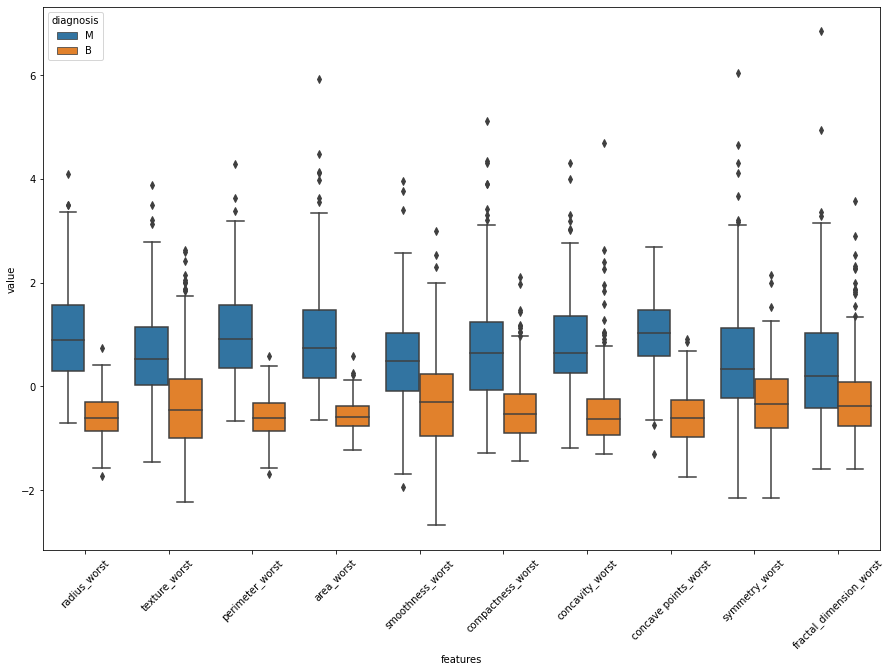

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 45)

* ***Swarm Plots***  
A **Swarm Plot** can be drawn on its own, but it is also a good complement to a **box or violin plot** in cases where you want to show all *observations along with some representation of the underlying distribution*. Arranging the points properly requires an accurate transformation between data and point coordinates.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

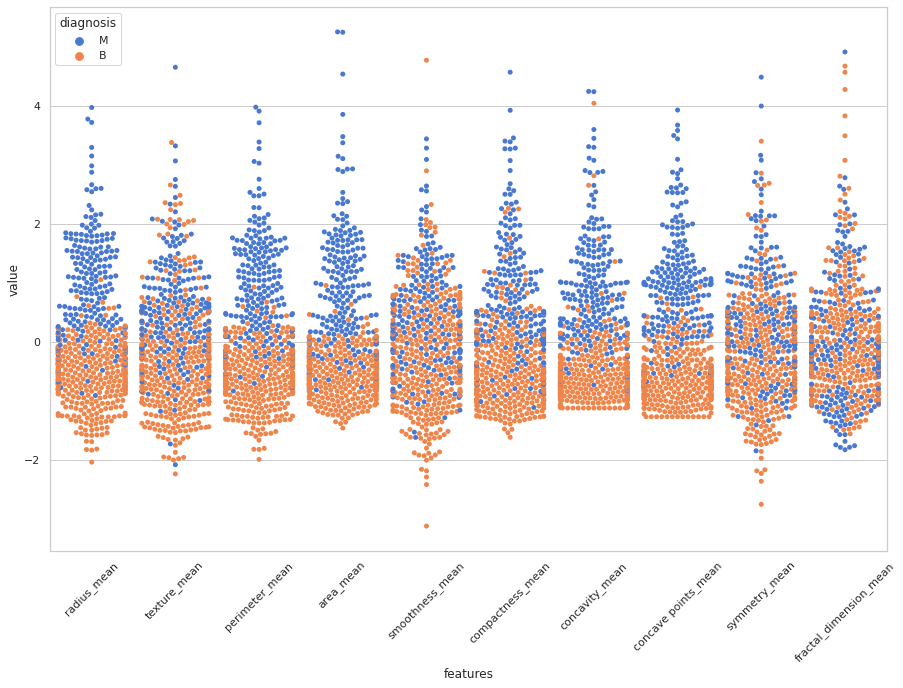

In [ ]:
sns.set(style="whitegrid", palette="muted")
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0 : 10]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (15,10))
sns.swarmplot(x="features", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

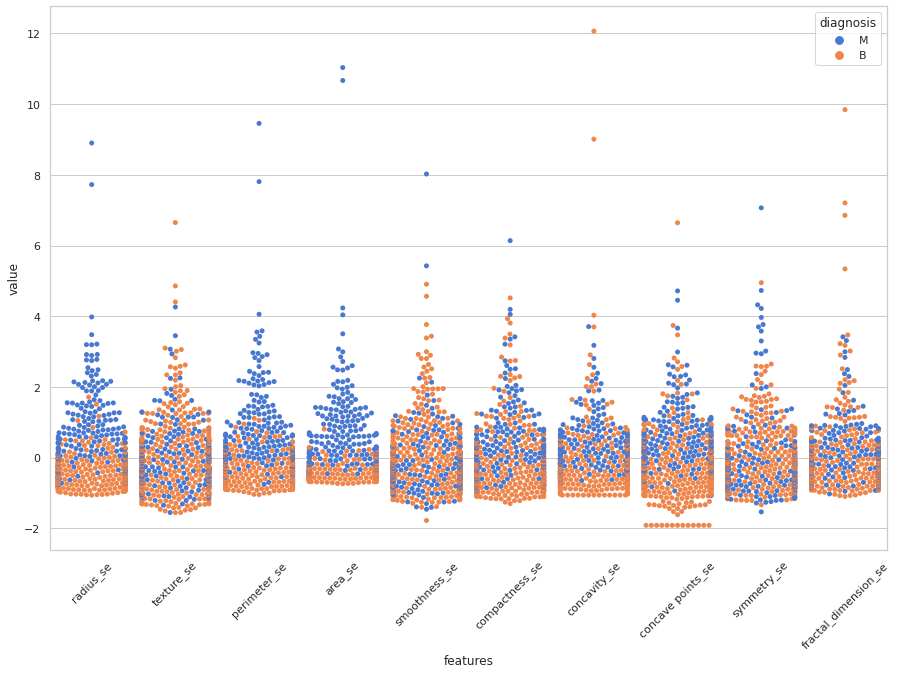

In [ ]:
sns.set(style="whitegrid", palette="muted")
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 10 : 20]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (15,10))
sns.swarmplot(x="features", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

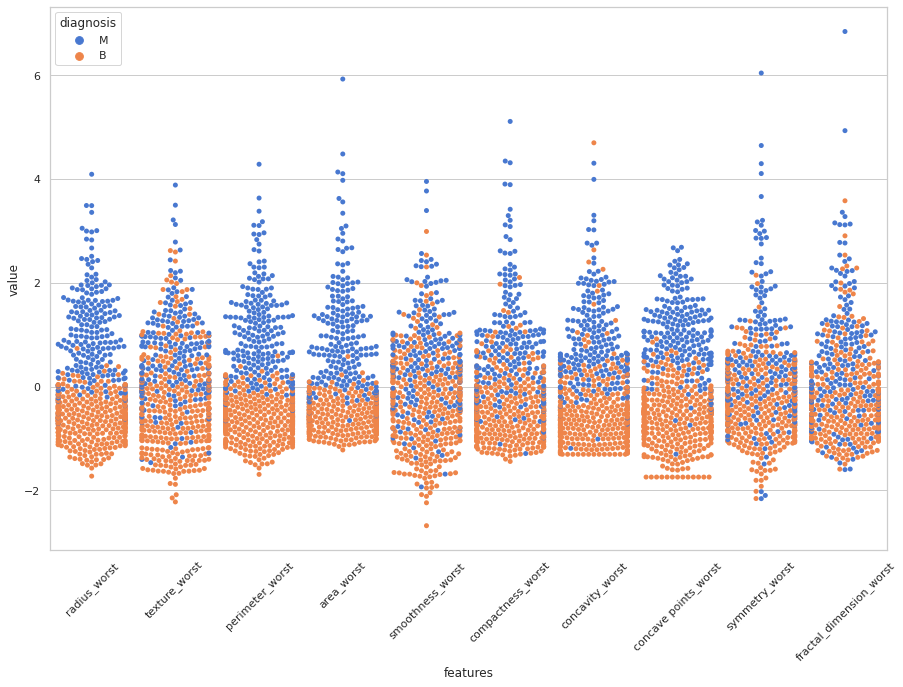

In [ ]:
sns.set(style="whitegrid", palette="muted")
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 20 : 30]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", 
              var_name = "features", 
              value_name = "value")
plt.figure(figsize = (15,10))
sns.swarmplot(x="features", y = "value", hue = "diagnosis", data = data)
plt.xticks(rotation = 45)

### Observing Pair-wise Correlations
* **Correlation Plot**  
A **correlation matrix** is a table showing *correlation coefficients between variables*. Each cell in the table shows the correlation between two variables. A correlation matrix is used to *summarize data*, as an input/diagnostics into an advanced analysis.


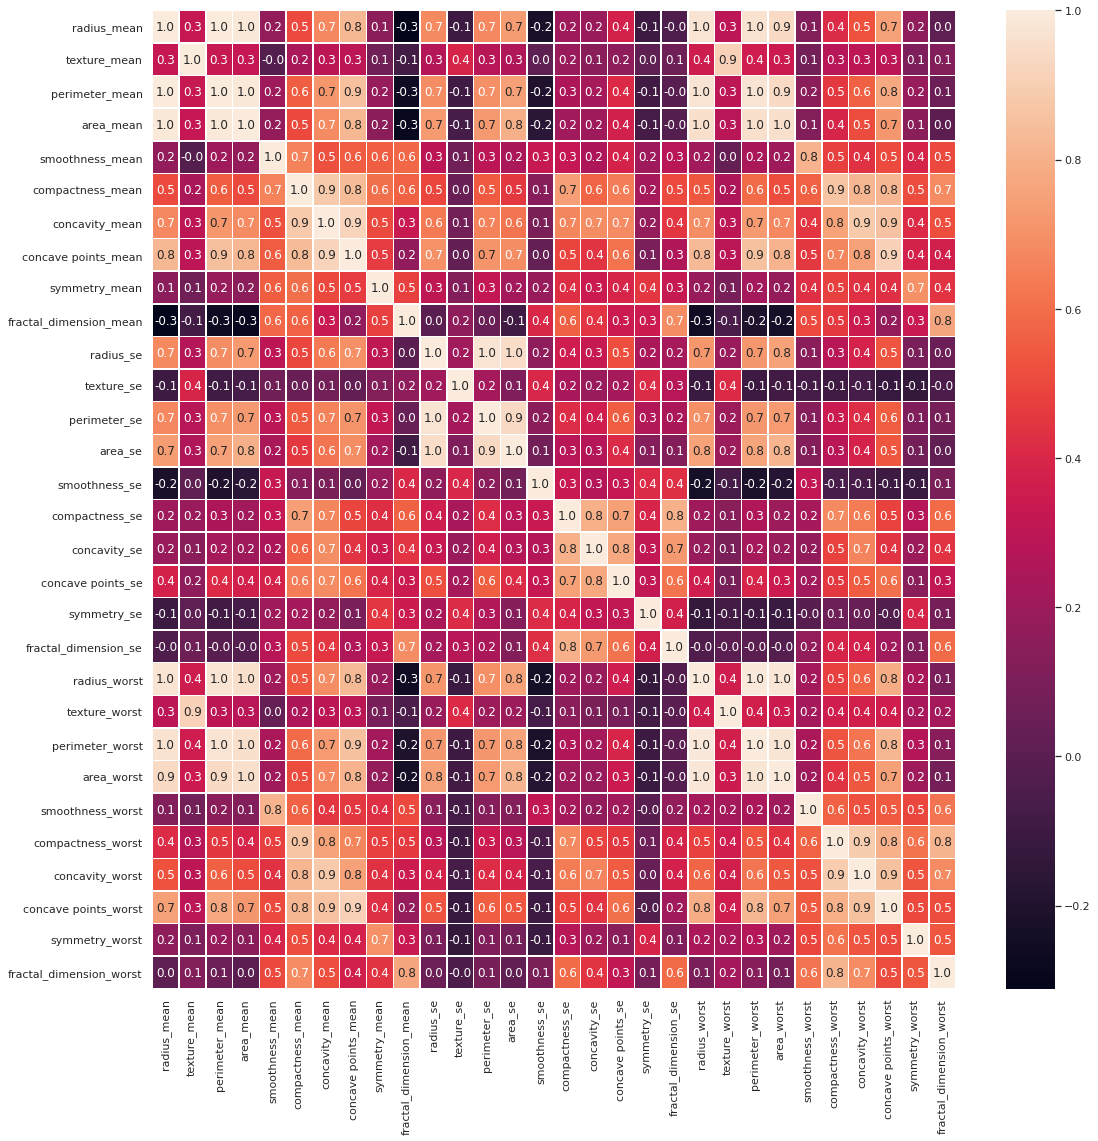

In [ ]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(x.corr(), annot = True, linewidth = .5, fmt = ".1f", ax = ax)

### Dropping Correlated Columns from Feature Matrix

We drop all the columns that have a pairwise correlation greater than the threshold of 0.9


In [ ]:
drop_cols = ["perimeter_mean", "radius_mean", "compactness_mean",
            "concave points_mean", "radius_se", "perimeter_se",
            "radius_worst", "perimeter_worst", "compactness_worst", 
            "concave points_worst", "compactness_se", "concave points_se",
            "texture_worst", "area_worst"]
df = x.drop(drop_cols, axis = 1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


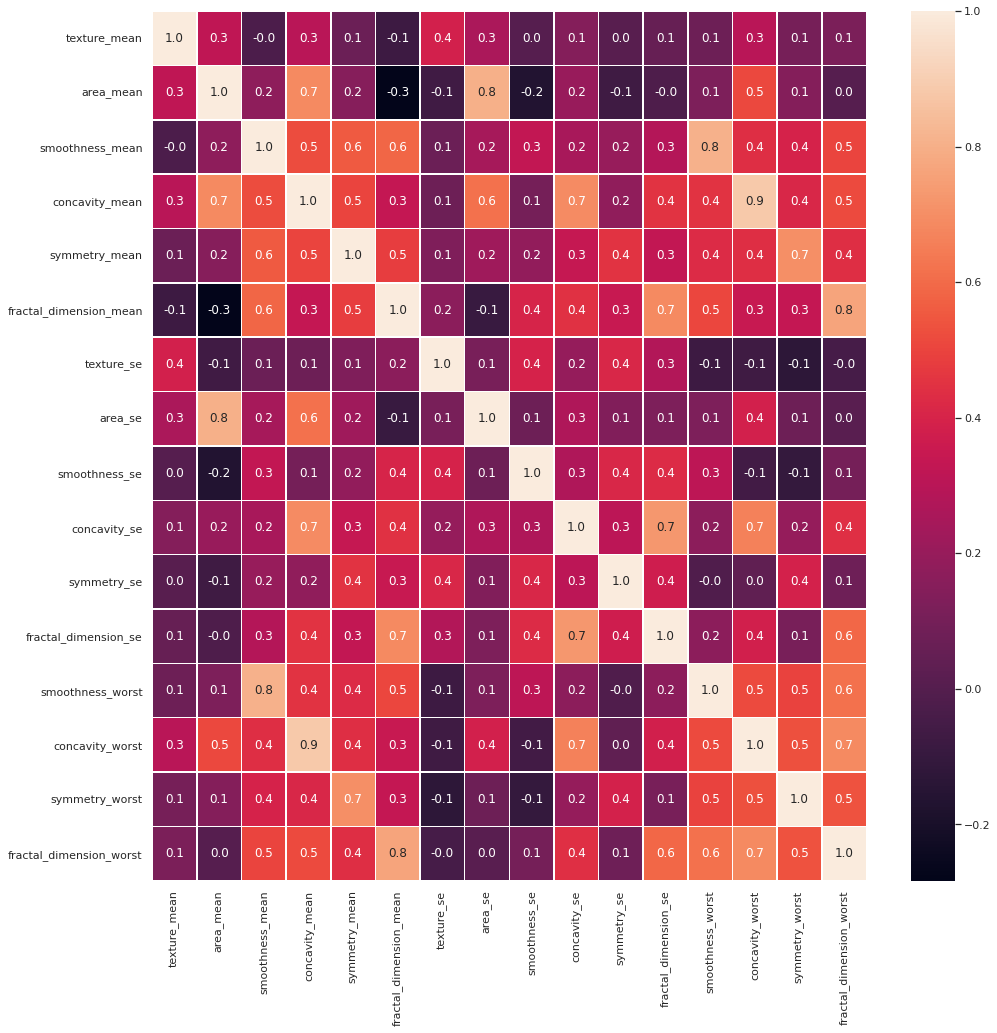

In [ ]:
f, ax = plt.subplots(figsize = (16,16))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)

### Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

### Building Model



In [ ]:
model = RandomForestClassifier(n_estimators = 10, n_jobs = -1, criterion = "entropy", max_features = "auto", random_state = 1234)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

### Accuracy

In [ ]:
model.score(X_test, y_test)

0.9824561403508771

## Result Analysis

In [ ]:
# function to visualize confusion matrix
def conf_matrix(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['B','M']
    plt.title('Harmerful or Not')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(cm[i][j]))
    plt.show()

In [ ]:
y_pred=model.predict(X_test)

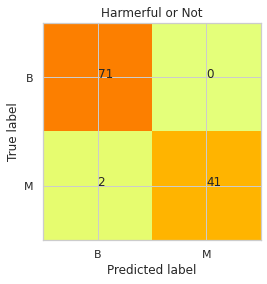

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix(cm)

## Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



(-1.0, 16.0)

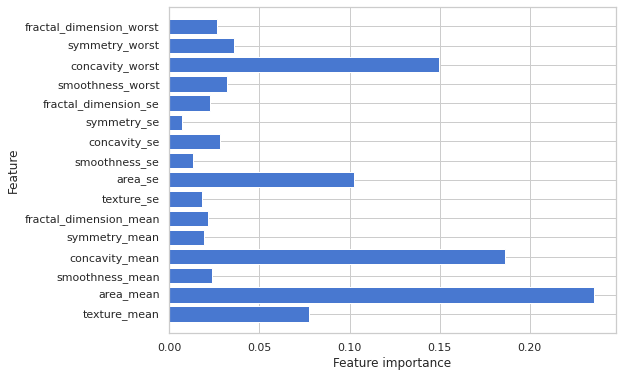

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(X_train.columns)
plt.barh(range(n_features),model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)